In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns
import json
from scipy import stats
from pandas.tools.plotting import parallel_coordinates



In [3]:
with open('movie_data.txt') as f:
    lines = f.readlines()
data = json.loads(lines[0])


In [4]:
def clean_dict_num(data): 
    data.pop('adult', None)
    data.pop('belongs_to_collection', None)
    data.pop('homepage', None)
    data.pop('id', None)
    data.pop('imdb_id', None)
    data.pop('video', None)
    #data.pop('vote_average', None)
    #data.pop('vote_count', None)
    genres = []
    for i in data['genres']:
        genres.append(i['name'])
    data['genres'] = genres
    companies = []
    for i in data['production_companies']:
        companies.append(i['id'])
    data['production_companies'] = companies
    production_companies = []
    for i in data['production_countries']:
        production_companies.append(i['name'])
    data['production_countries'] = production_companies
    spoken_languages = []
    for i in data['spoken_languages']:
        spoken_languages.append(i['name'])
    data['spoken_languages'] = spoken_languages
    return data

In [5]:
cleaned_data = []
for i in range(len(lines)):
    cleaned_data.append(clean_dict_num(json.loads(lines[i])))
df = pd.DataFrame.from_dict(cleaned_data)

In [6]:
td = df.genres.apply(pd.Series).add_prefix('genre_')
ndf = pd.merge(df, td, left_index=True, right_index=True)

In [7]:
ndf = ndf.drop("poster_path", axis=1)
ndf = ndf.drop("backdrop_path", axis=1)
ndf = ndf[ndf.runtime < 300]
#ndf = ndf[ndf.popularity < 50]
ndf = ndf[ndf.revenue != 0]
ndf = ndf[ndf.vote_average != 0]

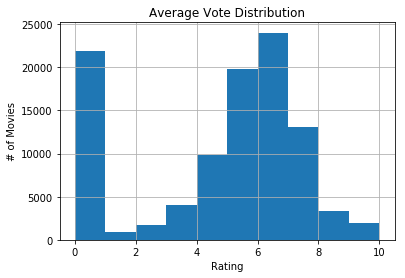

In [8]:
df['vote_average'].hist()
plt.title('Average Vote Distribution')
plt.xlabel('Rating')
plt.ylabel('# of Movies')
plt.subplots_adjust(top=0.88)
plt.savefig('votehist.png', transparent=True)

In [9]:
df.head()

,backdrop_path,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,/z2QUexmccqrvw1kDMw3R8TxAh5E.jpg,0,"[Drama, Crime, Comedy]",fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,5.826,/w0NzAc4Lv6euPtPAmsdEf0ZCF8C.jpg,[2303],[Finland],1988-10-21,0,73.0,"[Deutsch, suomi]",Released,,Ariel,7.0,73
1,/6YjUX87VtIEuDzanBE6obVxE9V3.jpg,0,"[Drama, Comedy]",fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",5.224,/7ad4iku8cYBuB08g9yAU7tHJik5.jpg,[2303],[Finland],1986-10-17,0,72.0,"[English, svenska, suomi]",Released,,Shadows in Paradise,7.5,88
2,/3EqYpbGCE9S5GddU2K4cYzP5UmI.jpg,4000000,"[Crime, Comedy]",en,Four Rooms,It's Ted the Bellhop's first night on the job....,11.352,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,"[14, 59]",[United States of America],1995-12-09,4300000,98.0,[English],Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.2,1147
3,/eXKgVIjLCFNpQkjVg1VpA8yM2GA.jpg,21,"[Action, Thriller, Crime]",en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",6.699,/lNXmgUrP6h1nD53gkFh4WDzT6RZ.jpg,"[33, 1644, 4248]","[Japan, United States of America]",1993-10-15,12,110.0,[English],Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,116
4,/udvB86uyzJ6P9vmB83WfrCbnmnI.jpg,42000,[Documentary],en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,1.679,/8YyIjOAxwzD3fZMdmJrfiApod4l.jpg,[19123],[Austria],2006-01-01,0,80.0,"[English, हिन्दी, 日本語, Pусский, Español]",Released,A Megacities remix.,Life in Loops (A Megacities RMX),7.4,7


In [10]:
df_tr = ndf.copy()
#df_tr = ndf[['title','vote_average', 'vote_count', 'genres', 'runtime', 'popularity', 'genre_0']].copy()

df_tr = pd.get_dummies(df_tr, columns=['genre_0'])

df_tr.columns
df_tr.head()


,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,...,genre_0_History,genre_0_Horror,genre_0_Music,genre_0_Mystery,genre_0_Romance,genre_0_Science Fiction,genre_0_TV Movie,genre_0_Thriller,genre_0_War,genre_0_Western
2,4000000,"[Crime, Comedy]",en,Four Rooms,It's Ted the Bellhop's first night on the job....,11.352,"[14, 59]",[United States of America],1995-12-09,4300000,...,0,0,0,0,0,0,0,0,0,0
3,21,"[Action, Thriller, Crime]",en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",6.699,"[33, 1644, 4248]","[Japan, United States of America]",1993-10-15,12,...,0,0,0,0,0,0,0,0,0,0
6,11000000,"[Adventure, Action, Science Fiction]",en,Star Wars,Princess Leia is captured and held hostage by ...,44.736,"[1, 25]",[United States of America],1977-05-25,775398007,...,0,0,0,0,0,0,0,0,0,0
7,94000000,"[Animation, Family]",en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",22.002,[3],[United States of America],2003-05-30,940335536,...,0,0,0,0,0,0,0,0,0,0
8,55000000,"[Comedy, Drama, Romance]",en,Forrest Gump,A man with a low IQ has accomplished great thi...,25.212,[4],[United States of America],1994-07-06,677945399,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#clmns = ['vote_average', 'runtime', 'popularity', 'genre_0_Action', 'genre_0_Adventure','genre_0_Animation','genre_0_Comedy','genre_0_Crime','genre_0_Documentary','genre_0_Drama','genre_0_Family','genre_0_Fantasy','genre_0_History','genre_0_Horror','genre_0_Music','genre_0_Mystery','genre_0_Romance','genre_0_Science Fiction','genre_0_TV Movie','genre_0_Thriller','genre_0_War','genre_0_Western' ]

clmns = ['genre_0_Action', 'genre_0_Adventure','genre_0_Animation','genre_0_Comedy','genre_0_Crime','genre_0_Documentary','genre_0_Drama','genre_0_Family','genre_0_Fantasy','genre_0_History','genre_0_Horror','genre_0_Music','genre_0_Mystery','genre_0_Romance','genre_0_Science Fiction','genre_0_TV Movie','genre_0_Thriller','genre_0_War','genre_0_Western' ]
df_tr_std = stats.zscore(df_tr[clmns])


In [12]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

In [13]:
df_tr['clusters'] = labels


In [14]:
clmns.extend(['clusters'])


In [15]:
df_tr[clmns].groupby(['clusters']).mean()


,genre_0_Action,genre_0_Adventure,genre_0_Animation,genre_0_Comedy,genre_0_Crime,genre_0_Documentary,genre_0_Drama,genre_0_Family,genre_0_Fantasy,genre_0_History,genre_0_Horror,genre_0_Music,genre_0_Mystery,genre_0_Romance,genre_0_Science Fiction,genre_0_TV Movie,genre_0_Thriller,genre_0_War,genre_0_Western
clusters,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.969697,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.230573,0.000000,0.082803,0.215287,0.040764,0.0,0.070064,0.109554,0.0,0.143949,0.002548,0.0,0.044586,0.059873
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
8,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [16]:
df_tr.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,...,genre_0_Horror,genre_0_Music,genre_0_Mystery,genre_0_Romance,genre_0_Science Fiction,genre_0_TV Movie,genre_0_Thriller,genre_0_War,genre_0_Western,clusters
2,4000000,"[Crime, Comedy]",en,Four Rooms,It's Ted the Bellhop's first night on the job....,11.352,"[14, 59]",[United States of America],1995-12-09,4300000,...,0,0,0,0,0,0,0,0,0,4
3,21,"[Action, Thriller, Crime]",en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",6.699,"[33, 1644, 4248]","[Japan, United States of America]",1993-10-15,12,...,0,0,0,0,0,0,0,0,0,1
6,11000000,"[Adventure, Action, Science Fiction]",en,Star Wars,Princess Leia is captured and held hostage by ...,44.736,"[1, 25]",[United States of America],1977-05-25,775398007,...,0,0,0,0,0,0,0,0,0,8
7,94000000,"[Animation, Family]",en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",22.002,[3],[United States of America],2003-05-30,940335536,...,0,0,0,0,0,0,0,0,0,9
8,55000000,"[Comedy, Drama, Romance]",en,Forrest Gump,A man with a low IQ has accomplished great thi...,25.212,[4],[United States of America],1994-07-06,677945399,...,0,0,0,0,0,0,0,0,0,0


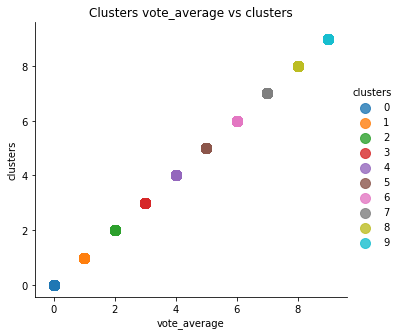

In [17]:
sns.lmplot('clusters', 'clusters', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters vote_average vs clusters')
plt.xlabel('vote_average')
plt.ylabel('clusters')
plt.subplots_adjust(top=0.88)
plt.savefig('screenshot.png', transparent=True)


In [18]:
C = df.vote_average.mean()
m = df.vote_count.quantile(0.85)
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [19]:
df_tr['weighted_rating'] = df_tr.apply(weighted_rating, axis=1)
df_tr.head()

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,...,genre_0_Music,genre_0_Mystery,genre_0_Romance,genre_0_Science Fiction,genre_0_TV Movie,genre_0_Thriller,genre_0_War,genre_0_Western,clusters,weighted_rating
2,4000000,"[Crime, Comedy]",en,Four Rooms,It's Ted the Bellhop's first night on the job....,11.352,"[14, 59]",[United States of America],1995-12-09,4300000,...,0,0,0,0,0,0,0,0,4,6.164780
3,21,"[Action, Thriller, Crime]",en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",6.699,"[33, 1644, 4248]","[Japan, United States of America]",1993-10-15,12,...,0,0,0,0,0,0,0,0,1,6.154135
6,11000000,"[Adventure, Action, Science Fiction]",en,Star Wars,Princess Leia is captured and held hostage by ...,44.736,"[1, 25]",[United States of America],1977-05-25,775398007,...,0,0,0,0,0,0,0,0,8,8.191692
7,94000000,"[Animation, Family]",en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",22.002,[3],[United States of America],2003-05-30,940335536,...,0,0,0,0,0,0,0,0,9,7.792681
8,55000000,"[Comedy, Drama, Romance]",en,Forrest Gump,A man with a low IQ has accomplished great thi...,25.212,[4],[United States of America],1994-07-06,677945399,...,0,0,0,0,0,0,0,0,0,8.393174


In [27]:
moviename = "Finding Nemo";
moviegenre = df_tr.loc[df_tr['title'] == moviename]
#df_recc = df[df.vote_average > 7]
#group = moviegenre.clusters
df_recc = df_tr[df_tr.clusters ==  moviegenre.iloc[0]['clusters'] ]
df_recc = df_recc[ df_recc.title != moviegenre.iloc[0]['title']]
df_recc = df_recc[ df_recc.original_language == moviegenre.iloc[0]['original_language']]
df_recc = df_recc.sort_values(by=['weighted_rating'], ascending=False)
df_redd = df_recc
for i in moviegenre.production_companies.tolist()[0]:
    df_redd = df_recc[df_recc.production_companies.apply(lambda x: i not in x)]
for i in moviegenre.production_companies.tolist()[0]:
    df_recc = df_recc[df_recc.production_companies.apply(lambda x: i in x)]
df_recc = df_recc.append(df_redd)
df_output = df_recc[['title','release_date', 'genres', 'runtime', 'vote_count', 'vote_average', 'weighted_rating']].copy()



In [28]:
df_output.head()



,title,release_date,genres,runtime,vote_count,vote_average,weighted_rating
5776,WALL·E,2008-06-22,"[Animation, Family, Science Fiction]",98.0,10548,8.0,7.991667
8366,Up,2009-05-28,"[Animation, Comedy, Family, Adventure]",96.0,12063,7.9,7.892926
704,Toy Story,1995-10-30,"[Animation, Comedy, Family]",81.0,9913,7.9,7.891396
463,"Monsters, Inc.",2001-11-01,"[Animation, Comedy, Family]",92.0,10534,7.7,7.692395
5332,Toy Story 3,2010-06-16,"[Animation, Family, Comedy]",103.0,8136,7.7,7.690160


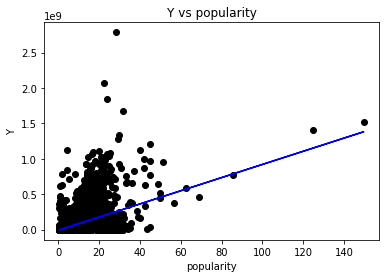

In [37]:
plt.scatter(df_tr.popularity, df_tr.revenue, color = 'black')
#plt.scatter(X_test.BP, Y_pred, color = 'blue')
z1 = np.polyfit(df_tr.popularity, df_tr.revenue, 1)
pfit = np.poly1d(z1)
plt.plot(df_tr.popularity,pfit(df_tr.popularity),"b-")
plt.title('Y vs popularity')
plt.xlabel('popularity')
plt.ylabel('Y')
plt.show()

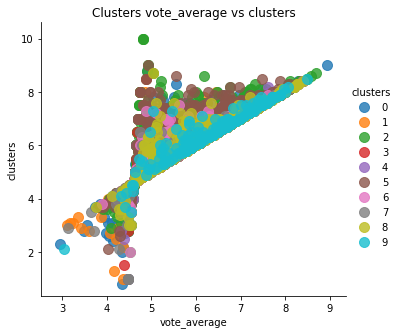

In [59]:
sns.lmplot('weighted_rating', 'vote_average', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters vote_average vs clusters')
plt.xlabel('vote_average')
plt.ylabel('clusters')
plt.subplots_adjust(top=0.88)
plt.savefig('screenshot.png', transparent=True)
